In [124]:
#1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#en la descripcion sale que los datos nulos estan representados con el 
#caracter '?' por lo que se especifica en read_cv
df = pd.read_csv('https://drive.google.com/uc?id=1YTnA4ikKK6nzd96isNEEVPoP1r_wVdQm&export=download&authuser=0',na_values='?')


In [125]:
#2
%matplotlib inline

from collections import Counter
sns.set(style='white', context='notebook', palette='deep')

In [69]:
pip install catboost

In [70]:
pip install xgboost

In [71]:
#3
from sklearn.ensemble import AdaBoostClassifier   # Ensamble AdaBoost para regresion
from sklearn.ensemble import GradientBoostingClassifier   # Ensamble Gradient Boosting para regresion
from sklearn.ensemble import RandomForestClassifier   # Ensamble RandomForest para regresion
from sklearn.ensemble import ExtraTreesClassifier     # Ensamble ExtraTrees para regresion

from sklearn.linear_model import LogisticRegression # para usar modelos de regresion logistica  
from sklearn.tree import DecisionTreeClassifier     # para usar modelos de tipo arboles de decision
from sklearn.neighbors import KNeighborsClassifier  # para modelos  Knn 
from sklearn.svm import SVC   # para modelos SVM
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgbm

from sklearn.model_selection import train_test_split  # para partir los datos en conjuntos de entrenamiento y validacion
from sklearn.model_selection import KFold  # para partir la data en k-folds
from sklearn.model_selection import cross_val_score   # para evaluar algoritmos en cross validacion 

from sklearn.metrics import accuracy_score, balanced_accuracy_score   # para manejar metricas de desempeño 
from sklearn.metrics import classification_report  # para hacer reportes de resultados de clasificacion
from sklearn.metrics import confusion_matrix  # para manejar matrices de confusion
from sklearn.metrics import f1_score

In [72]:
df.head()
#exploramos los que tipos de datos

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [73]:
df.shape
#el tamaño original del dataset descargado

(32561, 15)

In [74]:
df.isnull().sum()
#Buscamos datos nulos en las columnas

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [75]:
df=df.drop_duplicates()
#eliminamos las filas duplicadas

In [76]:
df.shape
#el nuevo tamaño del dataset

(32537, 15)

In [77]:
df.describe
#descripcion caracteristica de las variables numericas
#aca colocar todas las graficas
#y tambien el outlier

<bound method NDFrame.describe of        age workclass  fnlwgt  ... hours.per.week  native.country income
0       90       NaN   77053  ...             40   United-States  <=50K
1       82   Private  132870  ...             18   United-States  <=50K
2       66       NaN  186061  ...             40   United-States  <=50K
3       54   Private  140359  ...             40   United-States  <=50K
4       41   Private  264663  ...             40   United-States  <=50K
...    ...       ...     ...  ...            ...             ...    ...
32556   22   Private  310152  ...             40   United-States  <=50K
32557   27   Private  257302  ...             38   United-States  <=50K
32558   40   Private  154374  ...             40   United-States   >50K
32559   58   Private  151910  ...             40   United-States  <=50K
32560   22   Private  201490  ...             20   United-States  <=50K

[32537 rows x 15 columns]>

Text(0, 0.5, 'Capital gain / Income')

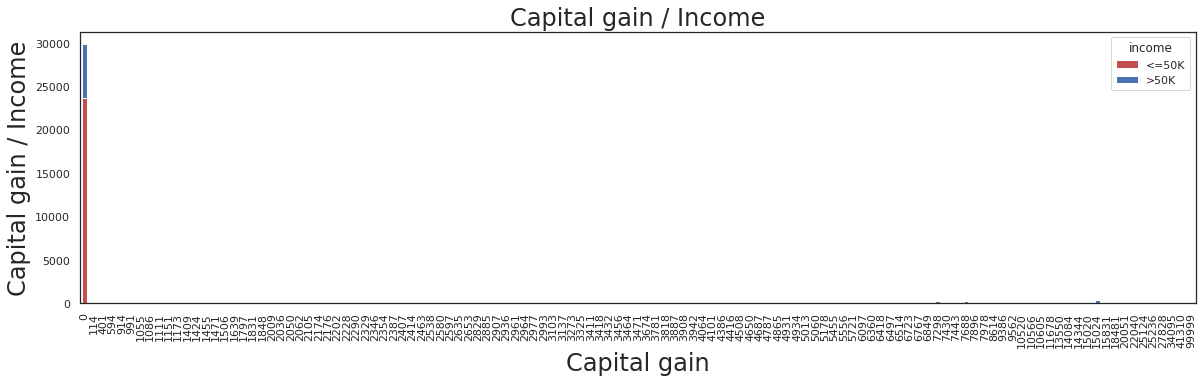

In [78]:
#A continuacion se mostraran graficas para enetender mejor los datos
pd.crosstab(df['capital.gain'],df.income).plot(kind='bar', figsize=(20,5), stacked=True,color=['r','b'])
plt.title('Capital gain / Income',fontsize=24)
plt.xlabel('Capital gain',fontsize=24)
plt.ylabel('Capital gain / Income',fontsize=24)

Text(0, 0.5, 'Capital loss / Income')

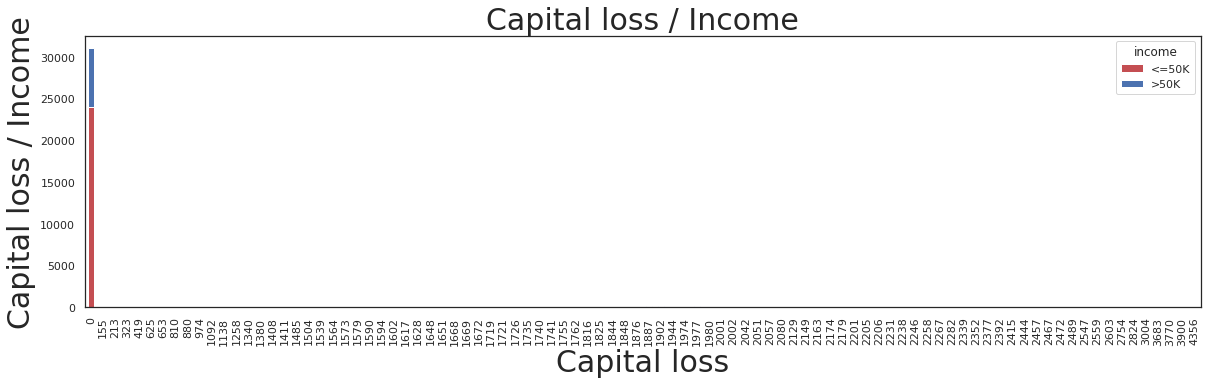

In [79]:
pd.crosstab(df['capital.loss'],df.income).plot(kind='bar', figsize=(20,5), stacked=True,color=['r','b'])
plt.title('Capital loss / Income',fontsize=30)
plt.xlabel('Capital loss',fontsize=30)
plt.ylabel('Capital loss / Income',fontsize=30)

Text(0, 0.5, 'Sex / Income')

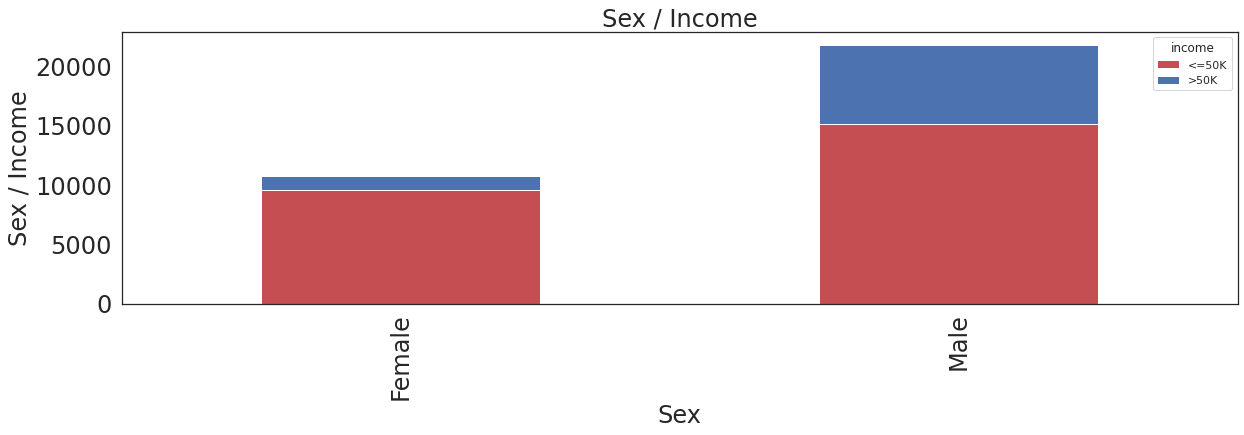

In [80]:
pd.crosstab(df.sex,df.income).plot(kind='bar', figsize=(20,5), stacked=True,color=['r','b'],fontsize=24)
plt.title('Sex / Income',fontsize=24)
plt.xlabel('Sex',fontsize=24)
plt.ylabel('Sex / Income',fontsize=24)

Text(0, 0.5, 'Native country / Income')

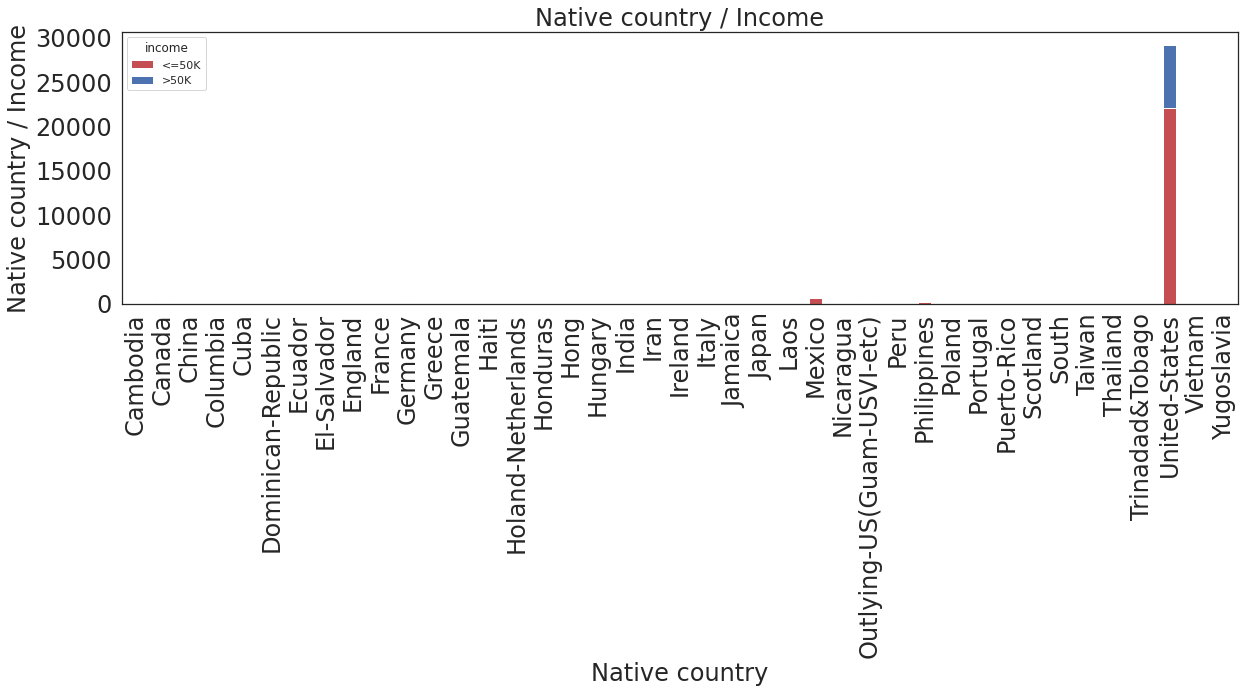

In [81]:
pd.crosstab(df['native.country'],df.income).plot(kind='bar', figsize=(20,5), stacked=True,color=['r','b'],fontsize=24)
plt.title('Native country / Income',fontsize=24)
plt.xlabel('Native country',fontsize=24)
plt.ylabel('Native country / Income',fontsize=24)

Text(0, 0.5, 'Race / Income')

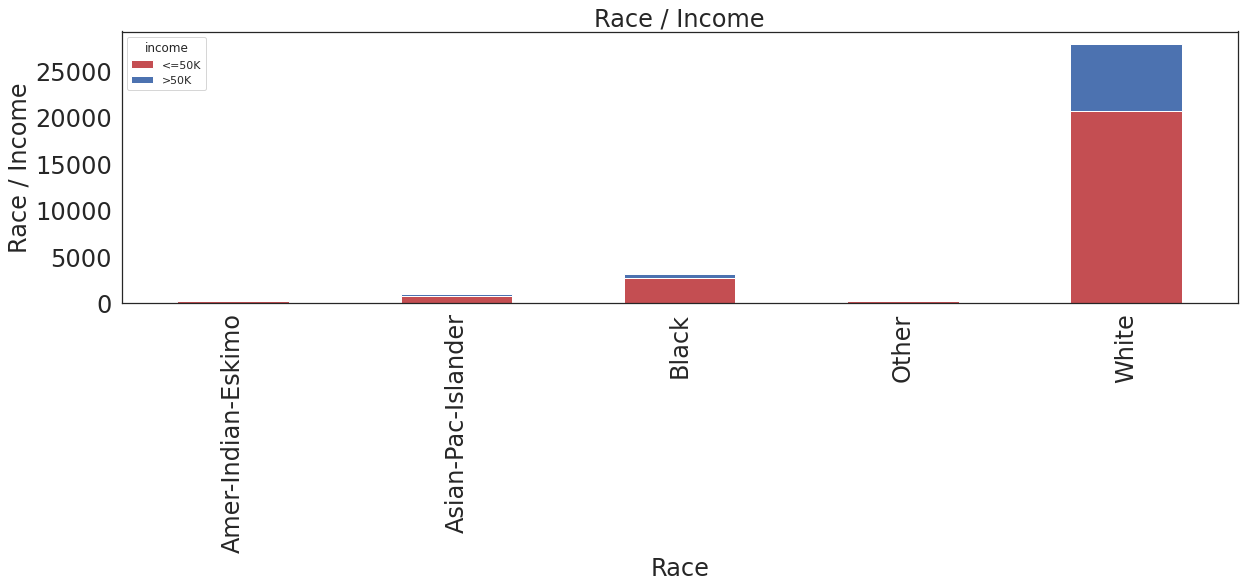

In [82]:
pd.crosstab(df.race,df.income).plot(kind='bar', figsize=(20,5), stacked=True,fontsize=24,color=['r','b'])
plt.title('Race / Income',fontsize=24)
plt.xlabel('Race',fontsize=24)
plt.ylabel('Race / Income',fontsize=24)

Text(0, 0.5, 'Workclass / Income')

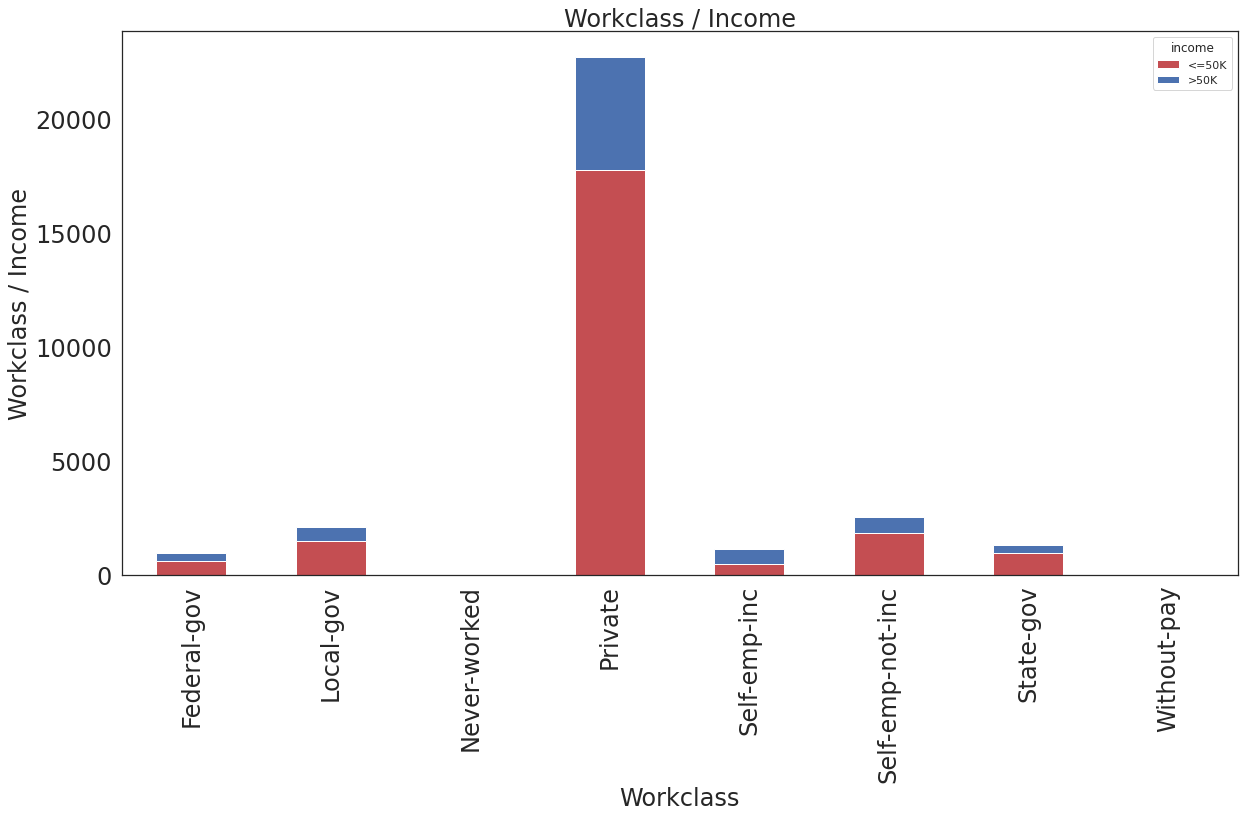

In [83]:
pd.crosstab(df.workclass,df.income).plot(kind='bar', figsize=(20,10), stacked=True,color=['r','b'],fontsize=24)
plt.title('Workclass / Income',fontsize=24)
plt.xlabel('Workclass',fontsize=24)
plt.ylabel('Workclass / Income',fontsize=24)

Text(0, 0.5, 'hours.per.week / Income')

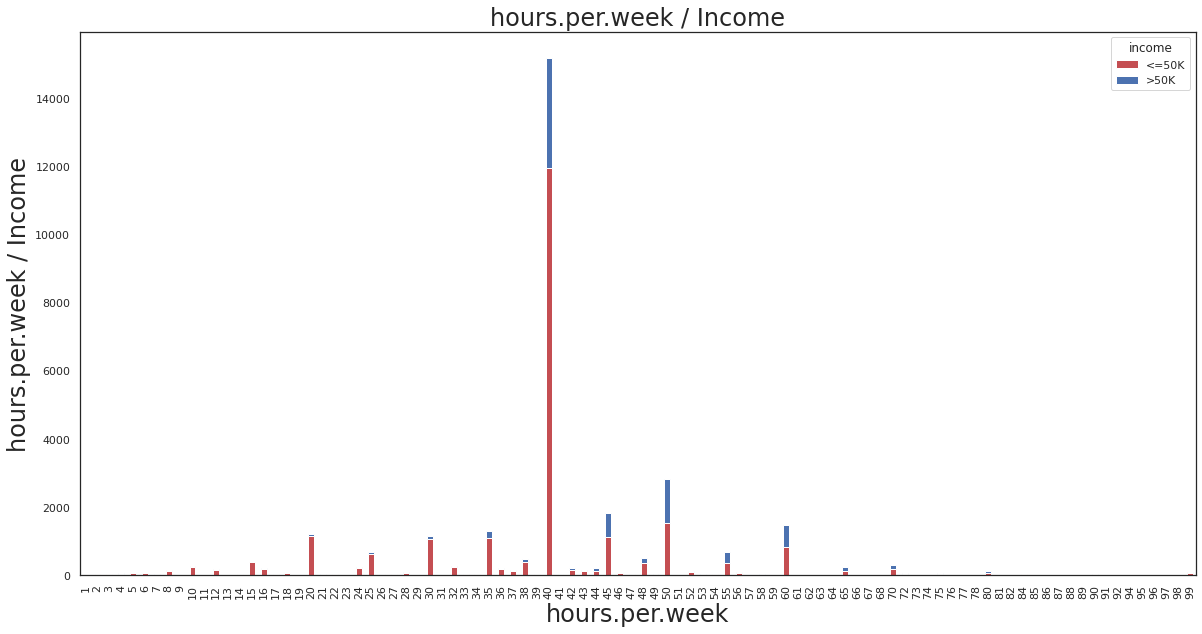

In [84]:
pd.crosstab(df['hours.per.week'],df.income).plot(kind='bar', figsize=(20,10), stacked=True,color=['r','b'])
plt.title('hours.per.week / Income',fontsize=24)
plt.xlabel('hours.per.week',fontsize=24)
plt.ylabel('hours.per.week / Income',fontsize=24)

Text(0, 0.5, 'age / Income')

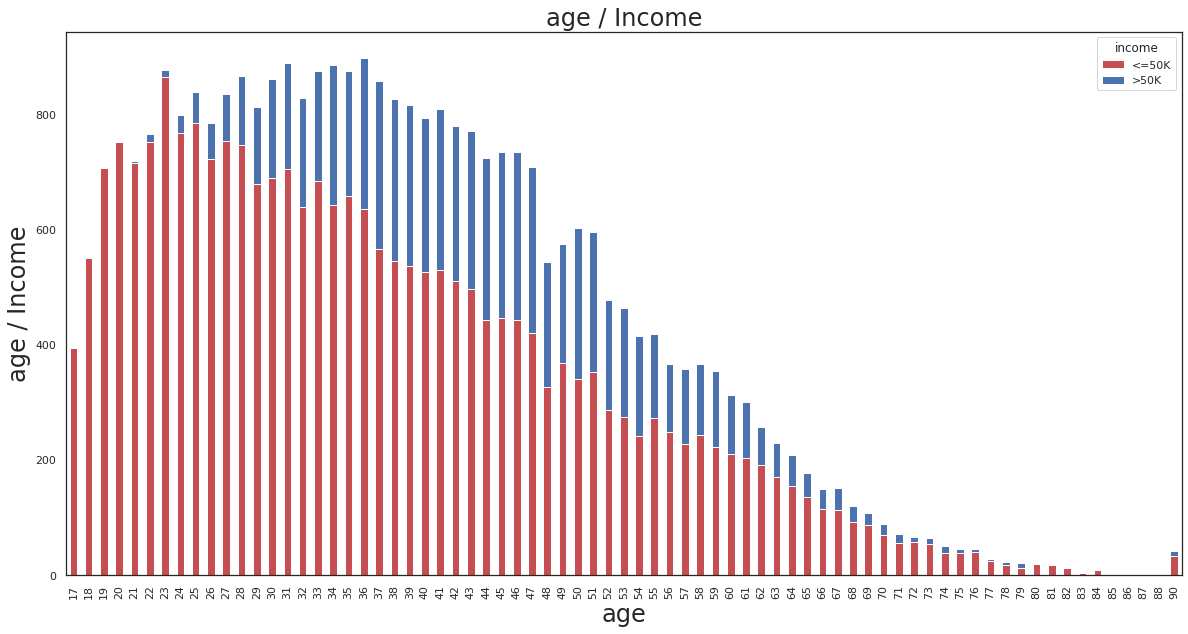

In [85]:
pd.crosstab(df['age'],df.income).plot(kind='bar', figsize=(20,10), stacked=True,color=['r','b'])
plt.title('age / Income',fontsize=24)
plt.xlabel('age',fontsize=24)
plt.ylabel('age / Income',fontsize=24)

Text(0, 0.5, 'relationship / Income')

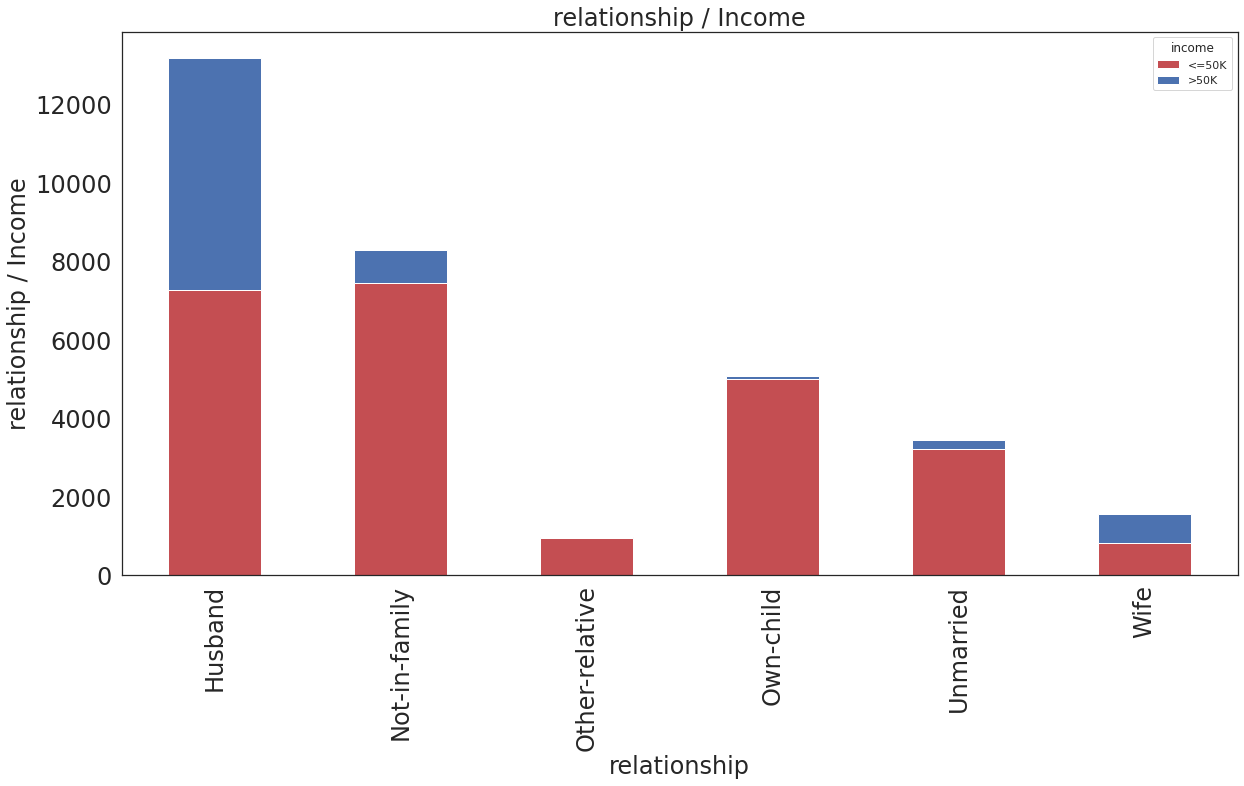

In [86]:
pd.crosstab(df['relationship'],df.income).plot(kind='bar', figsize=(20,10), stacked=True,color=['r','b'],fontsize=24)
plt.title('relationship / Income',fontsize=24)
plt.xlabel('relationship',fontsize=24)
plt.ylabel('relationship / Income',fontsize=24)

Text(0, 0.5, 'education / Income')

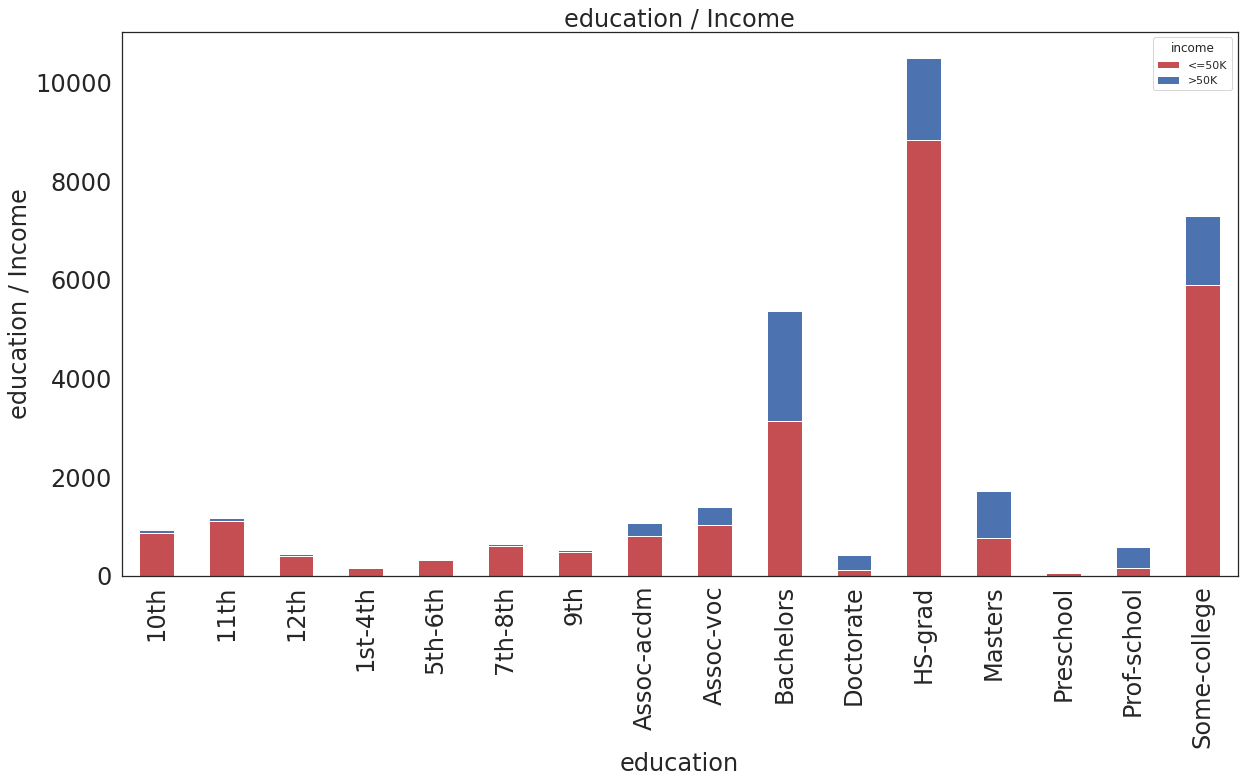

In [87]:
pd.crosstab(df['education'],df.income).plot(kind='bar', figsize=(20,10), stacked=True,color=['r','b'],fontsize=24)
plt.title('education / Income',fontsize=24)
plt.xlabel('education',fontsize=24)
plt.ylabel('education / Income',fontsize=24)

Text(0, 0.5, 'occupation / Income')

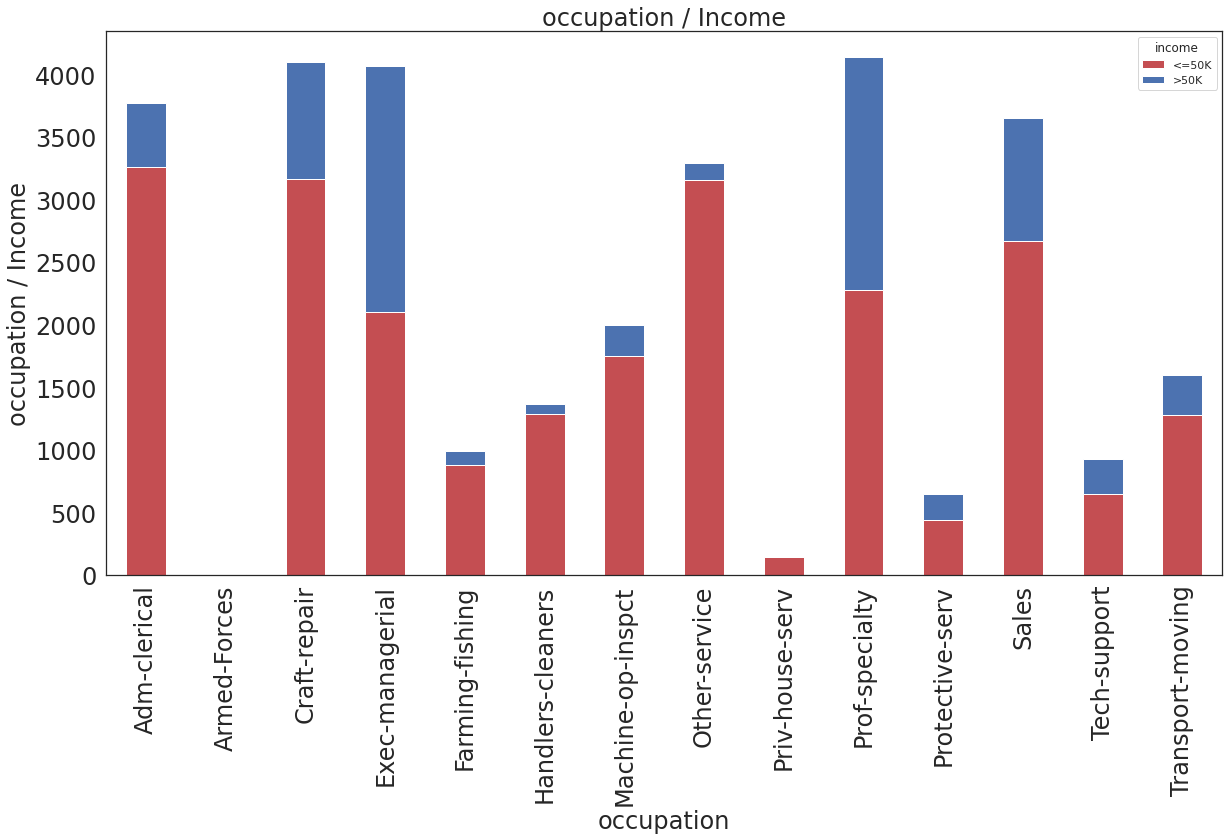

In [88]:
pd.crosstab(df['occupation'],df.income).plot(kind='bar', figsize=(20,10), stacked=True,color=['r','b'],fontsize=24)
plt.title('occupation / Income',fontsize=24)
plt.xlabel('occupation',fontsize=24)
plt.ylabel('occupation / Income',fontsize=24)

Text(0, 0.5, 'marital.status / Income')

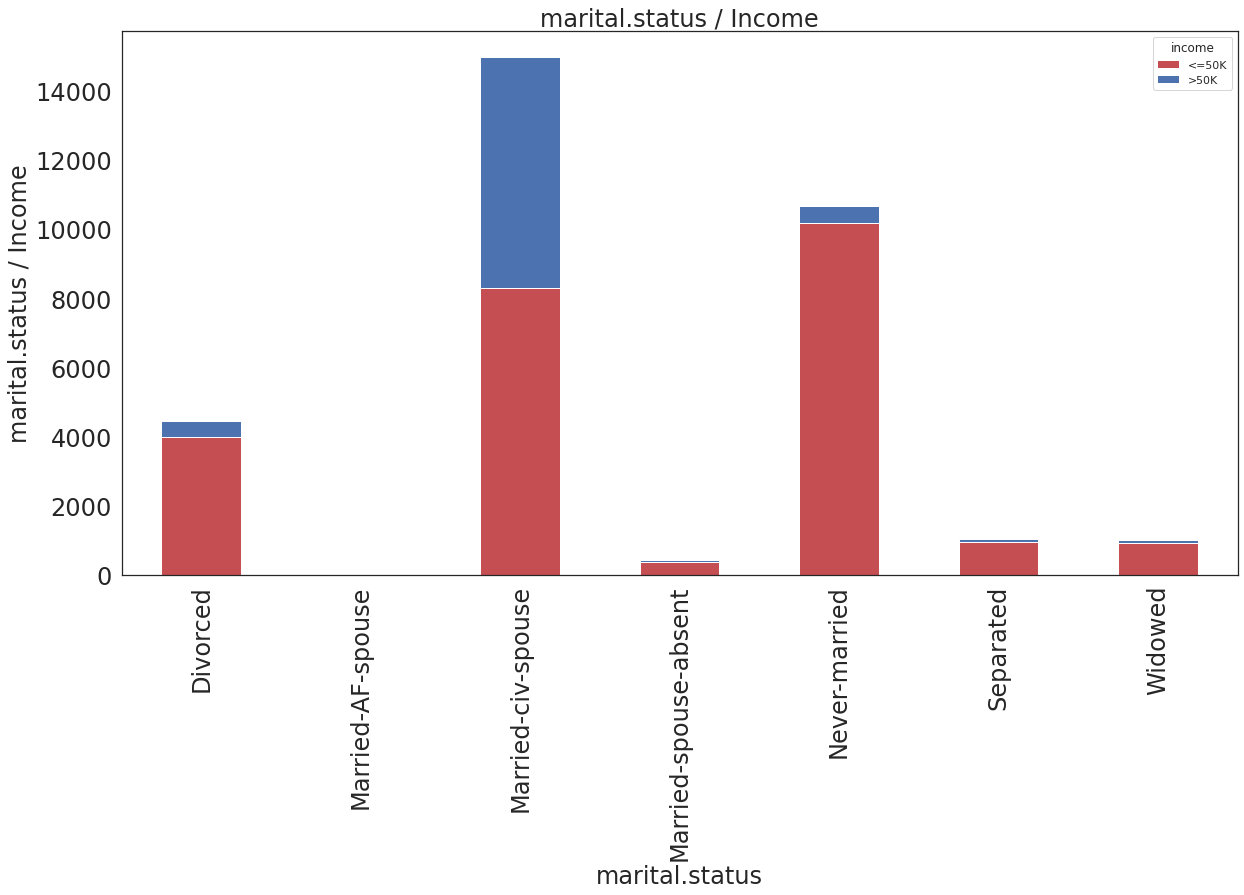

In [89]:
pd.crosstab(df['marital.status'],df.income).plot(kind='bar', figsize=(20,10), stacked=True,color=['r','b'],fontsize=24)
plt.title('marital.status / Income',fontsize=24)
plt.xlabel('marital.status',fontsize=24)
plt.ylabel('marital.status / Income',fontsize=24)

In [90]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)
#como obervasmos los datos nulos pertenecen a caracteriticos con predominanates
#reemplazamos los valores por la moda de cada uno

In [91]:
df.isnull().sum()
#verificamos que no existan valores nulos

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

##Columnas categoricas y numericas

In [92]:
col_numericas = df.select_dtypes('number').columns
col_categoricas = df.select_dtypes(['category','object']).columns
#separamos las variables nuemricas de la categoricas

In [93]:
col_categoricas

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [94]:
col_numericas

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [95]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [96]:
for cate in col_categoricas:
  label_encoder.fit(df[cate])
  df[cate] = label_encoder.transform(df[cate])
#usamos label encoder para convertir las valeriables categoricas a numericas

In [97]:
col_numericas = df.select_dtypes('number').columns
col_categoricas = df.select_dtypes(['category','object']).columns
#verificamos que no hayan variables categoricas

In [98]:
col_categoricas
#se verifica

Index([], dtype='object')

In [99]:
col_numericas

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [100]:
df.drop(columns=['fnlwgt'], inplace=True)
#como no se tiene informacion de esta columna se procede a eliminar
#ademas de que en la literatura tambien la eliminan

In [101]:
#  df.drop(columns=['sex'], inplace=True)
#  df.drop(columns=['race'], inplace=True)
#  df.drop(columns=['native.country'], inplace=True)

# df.drop(columns=['capital.loss'], inplace=True)
# df.drop(columns=['capital.gain'], inplace=True)

# se penso eliminar estas columnas, sin embargo el score 
# disminuia cuando se eliminaban , por ello se dejar9on

In [102]:
df.shape
# el tamaño de dataset con una columna eliminda

(32537, 14)

##Division de la data en train y test

In [103]:
X_all = df.drop('income',axis=1)
#dropeamos la columna con la variable a predecir (target)
y_all = df['income']

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20, random_state=123)

##Comparacion de los principales modelos de clasificacion


In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

pipelines = []
pipelines.append(('LR', make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear'))))
pipelines.append(('DecisionTreeClassifier', make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=6))))
pipelines.append(('KNN', make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))))
pipelines.append(('SVM', make_pipeline(StandardScaler(), SVC())))
pipelines.append(('AdaBoost', make_pipeline(StandardScaler(), AdaBoostClassifier())))
pipelines.append(('GradientBoosting', make_pipeline(StandardScaler(), GradientBoostingClassifier())))
pipelines.append(('RandomForest', make_pipeline(StandardScaler(), RandomForestClassifier())))
pipelines.append(('ExtraTrees', make_pipeline(StandardScaler(), ExtraTreesClassifier())))
pipelines.append(('XGBClassifier', make_pipeline(StandardScaler(), XGBClassifier())))
pipelines.append(('lgbm.LGBMClassifier', make_pipeline(StandardScaler(), lgbm.LGBMClassifier(silent=False))))
pipelines.append(('CatBoostClassifier', make_pipeline(StandardScaler(), CatBoostClassifier(silent=True))))
# Se usaron los modelos y ensambles de clasificacion vistos en el surso,
# asi como ensamble no vistos como ExtraTrees,XGBClassifier,lgbm.LGBMClassifier,CatBoostClassifier, ya que 
# se usaban frecuentemente en modelos de clasificacion binaria 

In [106]:
results = []
names = []

#particion en 10-folds para el cross-validation
seed = 7   
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  

#  evalua cada pipeline en cross-validation
for pipelinename, pipeline in pipelines:
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(pipelinename)
    print("{}: {} ({})".format(pipelinename, cv_results.mean(), cv_results.std()))

LR: 0.8245416584600693 (0.007591589004592787)
DecisionTreeClassifier: 0.8533558363893373 (0.005318804876133206)
KNN: 0.8289600954140599 (0.004816013087245126)
SVM: 0.8474394234996987 (0.005669999209173469)
AdaBoost: 0.8583886091345556 (0.00524863670569414)
GradientBoosting: 0.8625764247071389 (0.005329951998246122)
RandomForest: 0.848745830138051 (0.005762732304382555)
ExtraTrees: 0.838449323682867 (0.005071446679680725)
XGBClassifier: 0.8613854321109417 (0.005509320325922844)
lgbm.LGBMClassifier: 0.8697606350858097 (0.0059121038403171875)
CatBoostClassifier: 0.8709516276820072 (0.004762712941428912)


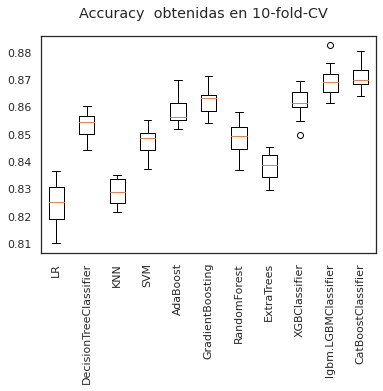

In [107]:
fig = plt.figure()
fig.suptitle('Accuracy  obtenidas en 10-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,rotation=90)
plt.show()
# Se grafican los accuracys obtenidos en un box-plot para identificar los mejores

In [108]:

#se hace un nuevo pipeline de los mejores ensables para poder observar
#mejor su desempeño
pipelines = []
pipelines.append(('AdaBoost', make_pipeline(StandardScaler(), AdaBoostClassifier())))
pipelines.append(('GradientBoosting', make_pipeline(StandardScaler(), GradientBoostingClassifier())))
pipelines.append(('XGBClassifier', make_pipeline(StandardScaler(), XGBClassifier())))
pipelines.append(('lgbm.LGBMClassifier', make_pipeline(StandardScaler(), lgbm.LGBMClassifier(silent=False))))
pipelines.append(('CatBoostClassifier', make_pipeline(StandardScaler(), CatBoostClassifier(silent=True))))

In [109]:
# Se usa de nuevo cross-validation
results = []
names = []


seed = 7   
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

#  evalua cada pipeline en crosvalidacion
for pipelinename, pipeline in pipelines:
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(pipelinename)
    print("{}: {} ({})".format(pipelinename, cv_results.mean(), cv_results.std()))

AdaBoost: 0.8583886091345556 (0.00524863670569414)
GradientBoosting: 0.8625764247071389 (0.005329951998246122)
XGBClassifier: 0.8613854321109417 (0.005509320325922844)
lgbm.LGBMClassifier: 0.8697606350858097 (0.0059121038403171875)
CatBoostClassifier: 0.8709516276820072 (0.004762712941428912)


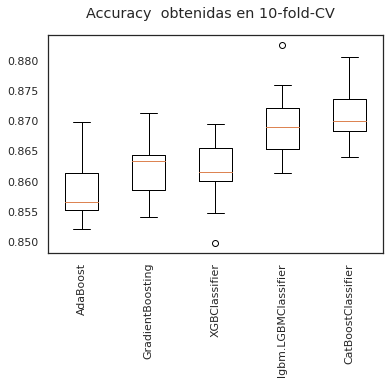

In [110]:
# Diagrama de cajas de los ensambles
fig = plt.figure()
fig.suptitle('Accuracy  obtenidas en 10-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,rotation=90)
plt.show()

#Busca de los mejores hiper-parametros

##Gradient Bossting Classifier

In [111]:
# el procedimiento a continuacion se describe a continuacio,
# 1 se define el modelo con hiperparametros en defualt para saber su desempeño incial
# 2 se definen los hiperparametrso que se pueden probar 
# 3 con GridSearch se probaran las combinaciones posibles
# luego se buscara el mejor resulatdo y se concluira si hubo mejora
# (codigo extraido de las clases del curso y adapatdo para cada ensamble)
rf = GradientBoostingClassifier()
rf.fit(X_train, y_train)

print('Exactitud del modelo inicial en entrenamiento:', rf.score(X_train, y_train))

#print('Exactitud del modelo inicial en validación:', rf.score(X_val, y_val))

Exactitud del modelo inicial en entrenamiento: 0.8662645510776442


In [112]:
#loss=['deviance','exponential']
n_estimators = [100,150,200,250,300,400]
learning_rate = [0.01,0.1,0.2,0.3,0.4,0.5]
#criterion=['friedman_mse', 'mse', 'mae']

segundo_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate}

print('Los valores a probar en la búsqueda por grilla son:')
print(segundo_grid)

Los valores a probar en la búsqueda por grilla son:
{'n_estimators': [100, 150, 200, 250, 300, 400], 'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]}


In [113]:
from sklearn.model_selection import GridSearchCV

rf = GradientBoostingClassifier()
rf_grid = GridSearchCV(estimator = rf, 
                        param_grid = segundo_grid, 
                        cv = 3,          # Validación cruzada 3-fold
                        verbose=2, 
                        n_jobs = -1      # Paralelizar en todos los cores disponibles
                        )
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  4.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [114]:
rf_grid_best = rf_grid.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
print(rf_grid.best_params_)
print()

print('Exactitud luego de búsqueda en grilla en entrenamiento:', rf_grid_best.score(X_train, y_train))
print('Exactitud luego de búsqueda en grilla en validación:', rf_grid_best.score(X_test, y_test))
# A diferencia del modelo incial, hubo mejora con los hiperparametros, 
# por lo que se usaran estos 

Los hiperparámetros del mejor modelo son:
{'learning_rate': 0.1, 'n_estimators': 400}

Exactitud luego de búsqueda en grilla en entrenamiento: 0.8810941642014676
Exactitud luego de búsqueda en grilla en validación: 0.8776889981561156


##Ada Boost Classifier

In [115]:
rf = AdaBoostClassifier()
rf.fit(X_train, y_train)

print('Exactitud del modelo inicial en entrenamiento:', rf.score(X_train, y_train))

#print('Exactitud del modelo inicial en validación:', rf.score(X_val, y_val))

Exactitud del modelo inicial en entrenamiento: 0.8587729071420339


In [116]:
#loss=['deviance','exponential']
n_estimators = [50,100,110,150,200,250,200,300,400]
learning_rate = [0.01,0.1,0.2,0.3,0.4,0.5]



segundo_grid = {'n_estimators': n_estimators,
              # 'loss':loss,
               #'subsample':subsample,
               #'criterion':criterion,
               'learning_rate': learning_rate}

print('Los valores a probar en la búsqueda por grilla son:')
print(segundo_grid)

Los valores a probar en la búsqueda por grilla son:
{'n_estimators': [50, 100, 110, 150, 200, 250, 200, 300, 400], 'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]}


In [117]:
from sklearn.model_selection import GridSearchCV

rf = AdaBoostClassifier()
rf_grid = GridSearchCV(estimator = rf, 
                        param_grid = segundo_grid, 
                        cv = 3,          # Validación cruzada 3-fold
                        verbose=2, 
                        n_jobs = -1      # Paralelizar en todos los cores disponibles
                        )
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  4.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'n_estimators': [50, 100, 110, 150, 200, 250, 200, 300,
                                          400]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [118]:
rf_grid_best = rf_grid.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
print(rf_grid.best_params_)
print()

print('Exactitud luego de búsqueda en grilla en entrenamiento:', rf_grid_best.score(X_train, y_train))
print('Exactitud luego de búsqueda en grilla en validación:', rf_grid_best.score(X_test, y_test))
# A diferencia del modelo incial, hubo mejora con los hiperparametros, 
# por lo que se usaran estos 

Los hiperparámetros del mejor modelo son:
{'learning_rate': 0.4, 'n_estimators': 400}

Exactitud luego de búsqueda en grilla en entrenamiento: 0.865150409159015
Exactitud luego de búsqueda en grilla en validación: 0.8695451751690227


##XGBClassifier

In [119]:
rf = XGBClassifier()
rf.fit(X_train, y_train)
print('Exactitud del modelo inicial en entrenamiento:', rf.score(X_train, y_train))

Exactitud del modelo inicial en entrenamiento: 0.8642667793614814


In [120]:

subsample=[0.5,0.7,0.9,1]
eta = [0.01,0.1,0.2,0.3,0.4,0.5]



segundo_grid = {#'n_estimators': n_estimators,
              # 'loss':loss,
               'subsample':subsample,
               #'criterion':criterion,
               'eta': eta}

print('Los valores a probar en la búsqueda por grilla son:')
print(segundo_grid)

Los valores a probar en la búsqueda por grilla son:
{'subsample': [0.5, 0.7, 0.9, 1], 'eta': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]}


In [121]:
from sklearn.model_selection import GridSearchCV

rf = XGBClassifier()
rf_grid = GridSearchCV(estimator = rf, 
                        param_grid = segundo_grid, 
                        cv = 3,          # Validación cruzada 3-fold
                        verbose=2, 
                        n_jobs = -1      # Paralelizar en todos los cores disponibles
                        )
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   45.5s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'eta': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'subsample': [0.5, 0.7, 0.9, 1]},
             pre_dispatch='2*n_jobs', refit=True, retur

In [122]:
rf_grid_best = rf_grid.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
print(rf_grid.best_params_)
print()

print('Exactitud luego de búsqueda en grilla en entrenamiento:', rf_grid_best.score(X_train, y_train))
print('Exactitud luego de búsqueda en grilla en validación:', rf_grid_best.score(X_test, y_test))
# A diferencia del modelo incial, hubo mejora con los hiperparametros,aunque menor comparada con la obtenida anteriormente 
# aun asi, se usaran estos hiperparametros

Los hiperparámetros del mejor modelo son:
{'eta': 0.01, 'subsample': 0.9}

Exactitud luego de búsqueda en grilla en entrenamiento: 0.8653040839064121
Exactitud luego de búsqueda en grilla en validación: 0.8627842655193608


##LGBMClassifier

In [123]:
rf = lgbm.LGBMClassifier(silent=True)
rf.fit(X_train, y_train)
print('Exactitud del modelo inicial en entrenamiento:', rf.score(X_train, y_train))

Exactitud del modelo inicial en entrenamiento: 0.8841676591494103


In [126]:
n_estimators = [50,100,200,300,400]
learning_rate = [0.01,0.1,0.2,0.4]



segundo_grid = {'n_estimators': n_estimators,
              # 'loss':loss,
               #'subsample':subsample,
               #'criterion':criterion,
               'learning_rate': learning_rate}

print('Los valores a probar en la búsqueda por grilla son:')
print(segundo_grid)

Los valores a probar en la búsqueda por grilla son:
{'n_estimators': [50, 100, 200, 300, 400], 'learning_rate': [0.01, 0.1, 0.2, 0.4]}


In [127]:
from sklearn.model_selection import GridSearchCV

rf = lgbm.LGBMClassifier()
rf_grid = GridSearchCV(estimator = rf, 
                        param_grid = segundo_grid, 
                        cv = 3,          # Validación cruzada 3-fold
                        verbose=2, 
                        n_jobs = -1      # Paralelizar en todos los cores disponibles
                        )
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   25.5s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.4],
                         'n_est

In [128]:
rf_grid_best = rf_grid.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
print(rf_grid.best_params_)
print()

print('Exactitud luego de búsqueda en grilla en entrenamiento:', rf_grid_best.score(X_train, y_train))
print('Exactitud luego de búsqueda en grilla en validación:', rf_grid_best.score(X_test, y_test))
# Segun la documentacion y tambien resultado del Grid-Search, los hiperparamtros
# por defecto son los mejores por lo que no sera necesario definirlos

Los hiperparámetros del mejor modelo son:
{'learning_rate': 0.1, 'n_estimators': 100}

Exactitud luego de búsqueda en grilla en entrenamiento: 0.8841676591494103
Exactitud luego de búsqueda en grilla en validación: 0.8807621389059619


##CatBoost

In [129]:
rf = CatBoostClassifier(silent=True)
rf.fit(X_train, y_train)
print('Exactitud del modelo inicial en entrenamiento:', rf.score(X_train, y_train))

Exactitud del modelo inicial en entrenamiento: 0.8953474970225518


In [130]:
n_estimators = [100,200,400,600]
learning_rate = [0.01,0.05,0.1,0.2]



segundo_grid = {'n_estimators': n_estimators,
              # 'loss':loss,
              # 'subsample':subsample,
               #'criterion':criterion,
               'learning_rate': learning_rate}

print('Los valores a probar en la búsqueda por grilla son:')
print(segundo_grid)

Los valores a probar en la búsqueda por grilla son:
{'n_estimators': [100, 200, 400, 600], 'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2, 0.3]}


In [131]:
from sklearn.model_selection import GridSearchCV

rf = CatBoostClassifier(silent=True)
rf_grid = GridSearchCV(estimator = rf, 
                        param_grid = segundo_grid, 
                        cv = 3,          # Validación cruzada 3-fold
                        verbose=2, 
                        n_jobs = -1      # Paralelizar en todos los cores disponibles
                        )
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  3.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f5d06644828>,
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2, 0.3],
                         'n_estimators': [100, 200, 400, 600]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [132]:
rf_grid_best = rf_grid.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
print(rf_grid.best_params_)
print()

print('Exactitud luego de búsqueda en grilla en entrenamiento:', rf_grid_best.score(X_train, y_train))
print('Exactitud luego de búsqueda en grilla en validación:', rf_grid_best.score(X_test, y_test))
#Se observa que buscando mejorar los hiperparametros , no se obtuvo una mejora por lo que se dejara en default.

Los hiperparámetros del mejor modelo son:
{'learning_rate': 0.05, 'n_estimators': 600}

Exactitud luego de búsqueda en grilla en entrenamiento: 0.8898536248031043
Exactitud luego de búsqueda en grilla en validación: 0.8784572833435771


##Modelos con hyperparametrso mejorados

In [133]:
GBC_model=GradientBoostingClassifier(learning_rate=0.2,n_estimators=250,subsample=1)
GBC_model.fit(X_train,y_train)
print('Exactitud maxima alcanzada:', GBC_model.score(X_train, y_train))
print('Exactitud maxima alcanzada en validación:', GBC_model.score(X_test, y_test))

Exactitud maxima alcanzada: 0.8829766798570825
Exactitud maxima alcanzada en validación: 0.879379225568531


In [134]:
AB_model=AdaBoostClassifier(learning_rate=0.5,n_estimators=400)
AB_model.fit(X_train,y_train)
print('Exactitud maxima alcanzada:', AB_model.score(X_train, y_train))
print('Exactitud maxima alcanzada en validación:', AB_model.score(X_test, y_test))

Exactitud maxima alcanzada: 0.8660340389565485
Exactitud maxima alcanzada en validación: 0.8721573448063922


In [135]:
XGB_model=XGBClassifier(eta=0.01,subsample=0.9)
XGB_model.fit(X_train,y_train)
print('Exactitud maxima alcanzada:', XGB_model.score(X_train, y_train))
print('Exactitud maxima alcanzada en validación:', XGB_model.score(X_test, y_test))

Exactitud maxima alcanzada: 0.8653040839064121
Exactitud maxima alcanzada en validación: 0.8627842655193608


In [136]:
LGBM_model=lgbm.LGBMClassifier(silent=True)
LGBM_model.fit(X_train,y_train)
print('Exactitud maxima alcanzada:', LGBM_model.score(X_train, y_train))
print('Exactitud maxima alcanzada en validación:', LGBM_model.score(X_test, y_test))

Exactitud maxima alcanzada: 0.8841676591494103
Exactitud maxima alcanzada en validación: 0.8807621389059619


In [137]:
CAT_model=CatBoostClassifier(silent=True)
CAT_model.fit(X_train,y_train)
print('Exactitud maxima alcanzada:', CAT_model.score(X_train, y_train))
print('Exactitud maxima alcanzada en validación:', CAT_model.score(X_test, y_test))

Exactitud maxima alcanzada: 0.8953474970225518
Exactitud maxima alcanzada en validación: 0.8773816840811309


##Ensamble de ensamble

In [138]:
from sklearn.ensemble import VotingClassifier

ensamble_model = VotingClassifier(estimators=[('ADA', AB_model),
                                              ('XGB', XGB_model), 
                                              ('GBC', GBC_model), 
                                              ('LGBM', LGBM_model), 
                                              ('cat', CAT_model)],
                                  voting='soft', weights=[1, 1, 2, 3, 3])# Los pesos son asiganados por los scores obtenidos de cada uno

ensamble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('ADA',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=0.5,
                                                 n_estimators=400,
                                                 random_state=None)),
                             ('XGB',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, eta=0.01,
                                            gamma=0, learning_rate=0.1,
                                            max_delta_step=0, max_depth=3,
                                            min_child_weight=1, missin...
                                             min_child_weight=0.001,
          

In [139]:
print(f'Score de train del ensamble: {ensamble_model.score(X_train, y_train)}')
print(f'Score de test del ensamble: {ensamble_model.score(X_test, y_test)}')
#Aunque minima comparada con el uso de solo GradienBoosting, se logro una mejora en el score obtenido

Score de train del ensamble: 0.8874332475315994
Score de test del ensamble: 0.8801475107559926


##Matriz de confusion


In [140]:
from sklearn.metrics import accuracy_score

y_pred_train = ensamble_model.predict(X_train)
print('Train acc.: {}'.format(accuracy_score(y_train, y_pred_train)))

y_pred_test = ensamble_model.predict(X_test)
print('Test acc.: {}'.format(accuracy_score(y_test, y_pred_test)))

#accuracy score

Train acc.: 0.8874332475315994
Test acc.: 0.8801475107559926


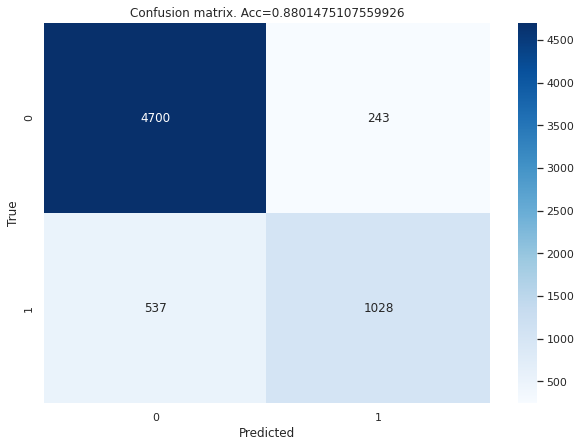

In [141]:
def print_confusion_matrix(confusion_matrix, accuracy):
  import seaborn as sn
  plt.figure(figsize=(10,7))
  sn.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion matrix. Acc={}'.format(accuracy))
  plt.show()  

  ###########
from sklearn.metrics import confusion_matrix
print_confusion_matrix(confusion_matrix(y_test,y_pred_test), accuracy_score(y_test, y_pred_test))